## Online Python tutorials

* Basics: [en](https://docs.python.org/3/tutorial) / [de](https://py-tutorial-de.readthedocs.io/de/python-3.3)
* [Numpy tutorial](https://colab.research.google.com/github/cs231n/cs231n.github.io/blob/master/python-colab.ipynb)

## 1. Display random walk data

A random walk adds a (small) random vector to the current state $x(t)$ like this: $x(t+1) = x(t) + \eta$, where $\eta$ is just a random variable, e.g. uniformly distributed in range $[-1, 1]$.

1. Generate a 1d random walk time series, starting from $x(0) = 0$ and display the series with matplotlib (as $x(t)$).
2. Generate a 2d random walk time series, starting from $x(0) = 0$ and display the series with matplotlib (as $x_2(x_1)$).

Avoid using any manual loops (`for` or `while`), but use numpy array functions instead. For example, look for [`cumsum`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

eta = np.random.uniform(-1.0, 1.0, size=(100,))
eta[0] = 0
plt.plot(np.cumsum(eta));

eta2 = np.random.uniform(-1.0, 1.0, size=(100,2))
eta2[0] = [0,0]
plt.figure()
plt.plot(*np.cumsum(eta2, axis=0).T);

## 2. More Plotting

1. Display the two-dimensional manifold $z=x \cdot y$ as a [wireframe and surface plot](https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html#toolkit-mplot3d-tutorial).
Sample the data in the range $[-1,1]^2$ with 20 samples in each direction.

2. Randomly select 30 images from the MNIST dataset and display them in a $5 \times 6$ grid using subplots.

Again, avoid explicit loops as far as possible.

((20, 10), (20, 10))


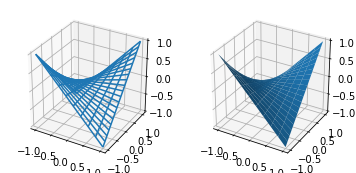

In [2]:
from mpl_toolkits.mplot3d import Axes3D  # enable 3d plotting

# create ranges for x and y
x = np.linspace(-1, 1, 10)
y = np.linspace(-1, 1, 20)
# and broadcast them into a grid
X, Y = np.meshgrid(x, y)
print(X.shape, Y.shape)
Z =  X * Y

# create two 3d plots in 1x2 table
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.plot_wireframe(X, Y, Z)
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, Z);

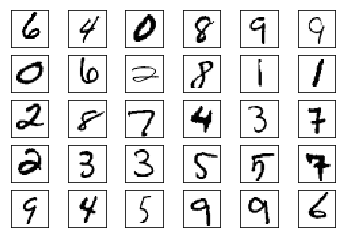

In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
selection = np.random.choice(x_train.shape[0],30)
samples = x_train[selection]

fig = plt.figure()
for idx in range(samples.shape[0]):
    ax = fig.add_subplot(5,6, idx+1, xticks=[], yticks=[]) # add subplot w/o any axis labels
    ax.imshow(samples[idx], cmap = "Greys")

## 3. Tensors

1. Split the MNIST data set into 120 batches á 500 samples and arrange them as a 4d tensor with the shape (120, 500, 28, 28).

2. Create a new shuffling of these batches.

(120, 500, 28, 28)
(120, 500, 28, 28)
(120, 500, 28, 28)
(120, 500, 28, 28)


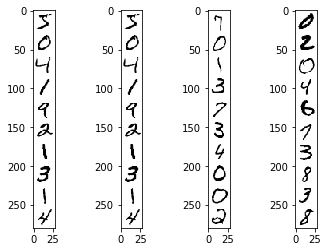

In [19]:
fig, ax = plt.subplots(1,4)

batches = x_train.reshape(120,-1,28,28)  # 1st option: reshaping
print(batches.shape)
ax[0].imshow(batches[0,:10].reshape(-1,28), cmap="Greys")

batches = np.array(np.split(x_train, 120))  # 2nd option: split
print(batches.shape)
ax[1].imshow(batches[0,:10].reshape(-1,28), cmap="Greys")

# shuffle acts on the first (batch) axis always
np.random.shuffle(batches)
print(batches.shape)
ax[2].imshow(batches[0,:10].reshape(-1,28), cmap="Greys")

# Usually shuffling should involve the whole dataset - before batching
batches = x_train[np.random.permutation(x_train.shape[0])].reshape(120,-1,28,28)
print(batches.shape)
ax[3].imshow(batches[0,:10].reshape(-1,28), cmap="Greys");

## 4. Broadcast Operations
In order to perform polynomial fitting we will need to collect the powers $x^1, x^2, x^3, x^4$ of our data samples x in a design matrix A with

$A_{ij} = x_i^j$
 
Create this matrix employing numpy's vectorization and broadcasting capabilities. Don't write an explicit loop.

In [27]:
x = np.arange(-1,1,0.1)
A = np.power(np.transpose([x]), [1,2,3,4])
np.set_printoptions(suppress=True) # print numbers in fixed point notation
print(A)

[[-1.      1.     -1.      1.    ]
 [-0.9     0.81   -0.729   0.6561]
 [-0.8     0.64   -0.512   0.4096]
 [-0.7     0.49   -0.343   0.2401]
 [-0.6     0.36   -0.216   0.1296]
 [-0.5     0.25   -0.125   0.0625]
 [-0.4     0.16   -0.064   0.0256]
 [-0.3     0.09   -0.027   0.0081]
 [-0.2     0.04   -0.008   0.0016]
 [-0.1     0.01   -0.001   0.0001]
 [-0.      0.     -0.      0.    ]
 [ 0.1     0.01    0.001   0.0001]
 [ 0.2     0.04    0.008   0.0016]
 [ 0.3     0.09    0.027   0.0081]
 [ 0.4     0.16    0.064   0.0256]
 [ 0.5     0.25    0.125   0.0625]
 [ 0.6     0.36    0.216   0.1296]
 [ 0.7     0.49    0.343   0.2401]
 [ 0.8     0.64    0.512   0.4096]
 [ 0.9     0.81    0.729   0.6561]]


## 5. Timing

Use [timeit](https://docs.python.org/3.8/library/timeit.html) to compare the computation time required for `naive_add` introduced [here](https://colab.research.google.com/github/rhaschke/Neural-Networks/blob/master/Intro%20Colab%2BTensors.ipynb) and numpy's vector-based *add*. For meaningful results, consider random matrices of size larger than $1000^2$.

In [31]:
def naive_add(x, y):
  assert len(x.shape) == 2      # x & y are 2D numpy tensors
  assert x.shape == y.shape
  x = x.copy()                  # Avoid overwriting the input tensor
  
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[i, j]
  return x

x = np.random.rand(1000,1000)
%timeit(naive_add(x,x))
%timeit(np.add(x,x))
%timeit(x+x)

1 loop, best of 3: 378 ms per loop
100 loops, best of 3: 3.58 ms per loop
100 loops, best of 3: 3.42 ms per loop
